(pratica_grav)=
# Prática 1: Distúrbios da gravidade

```{admonition} Objetivos
:class: important

1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla
1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla
1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla savefig
1. bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla bla
```

```{admonition} Antes de começar
:class: seealso

Esta prática depende do conteúdo das aulas:

* {ref}`gravidade`
```

## Bibliotecas

Vamos primeiro carregar as bibliotecas que vamos utilizar nessa prática.

In [1]:
import numpy as np
import xarray as xr
import ensaio
import harmonica as hm
import verde as vd
import boule
import pygmt

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


## Dados

In [2]:
caminho = ensaio.fetch_earth_gravity(version=1)

In [3]:
gravidade = xr.load_dataarray(caminho)
gravidade

<xarray.DataArray 'gravity' (latitude: 1081, longitude: 2161)>
array([[980106.5 , 980106.5 , 980106.5 , ..., 980106.5 , 980106.5 ,
        980106.5 ],
       [980108.25, 980108.25, 980108.25, ..., 980108.25, 980108.25,
        980108.25],
       [980108.8 , 980108.8 , 980108.8 , ..., 980108.75, 980108.75,
        980108.8 ],
       ...,
       [980153.8 , 980153.75, 980153.6 , ..., 980153.94, 980153.8 ,
        980153.8 ],
       [980160.44, 980160.44, 980160.44, ..., 980160.44, 980160.44,
        980160.44],
       [980157.5 , 980157.5 , 980157.5 , ..., 980157.5 , 980157.5 ,
        980157.5 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.8 180.0
  * latitude   (latitude) float64 -90.0 -89.83 -89.67 -89.5 ... 89.67 89.83 90.0
    height     (latitude, longitude) float32 1e+04 1e+04 1e+04 ... 1e+04 1e+04
Attributes:
    Conventions:     CF-1.8
    title:           Gravity acceleration (EIGEN-6C4) at a constant geometric...
    crs:             WGS84
    source:          Generated from the EIGEN-6C4 model by the ICGEM Calculat...
    license:         Creative Commons Attribution 4.0 International Licence
    references:      https://doi.org/10.5880/icgem.2015.1
    long_name:       gravity acceleration
    description:     magnitude of the gravity acceleration vector (gravitatio...
    units:           mGal
    actual_range:    [974748.6 980201.9]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

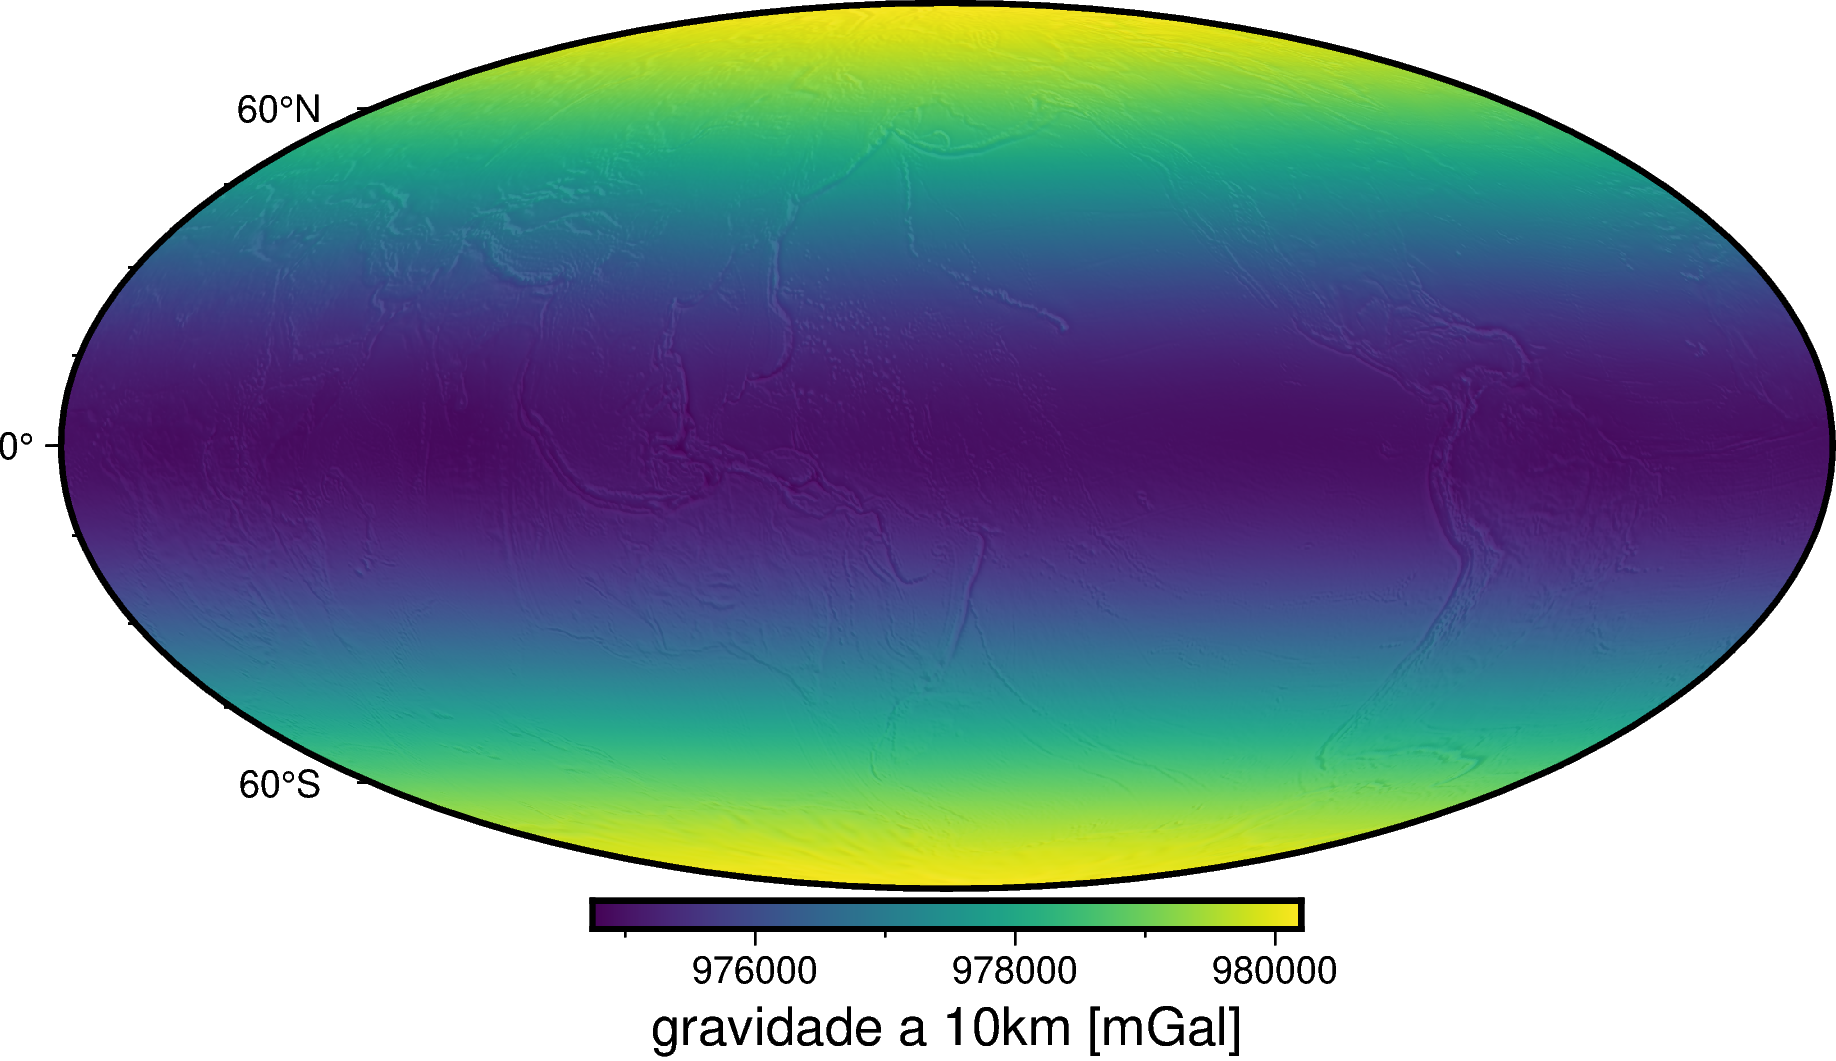

In [4]:
fig = pygmt.Figure()
fig.grdimage(
    grid=gravidade,
    cmap="viridis",
    shading="+a45+nt0.1",
    projection="W180/15c",
    frame="af",
)
fig.colorbar(
    frame='af+l"gravidade a 10km [mGal]"',
    position="JBC+h+o0/0.1c+w6c",
)
fig.show()

## Gravidade normal

In [5]:
normal = boule.WGS84.normal_gravity(gravidade.latitude, gravidade.height)
normal

<xarray.DataArray (latitude: 1081, longitude: 2161)>
array([[980142.33509235, 980142.33509235, 980142.33509235, ...,
        980142.33509235, 980142.33509235, 980142.33509235],
       [980142.29097894, 980142.29097894, 980142.29097894, ...,
        980142.29097894, 980142.29097894, 980142.29097894],
       [980142.15864042, 980142.15864042, 980142.15864042, ...,
        980142.15864042, 980142.15864042, 980142.15864042],
       ...,
       [980142.15864042, 980142.15864042, 980142.15864042, ...,
        980142.15864042, 980142.15864042, 980142.15864042],
       [980142.29097894, 980142.29097894, 980142.29097894, ...,
        980142.29097894, 980142.29097894, 980142.29097894],
       [980142.33509235, 980142.33509235, 980142.33509235, ...,
        980142.33509235, 980142.33509235, 980142.33509235]])
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.83 -89.67 -89.5 ... 89.67 89.83 90.0
  * longitude  (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.8 180.0
    height     (latitude, longitude) float32 1e+04 1e+04 1e+04 ... 1e+04 1e+04

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


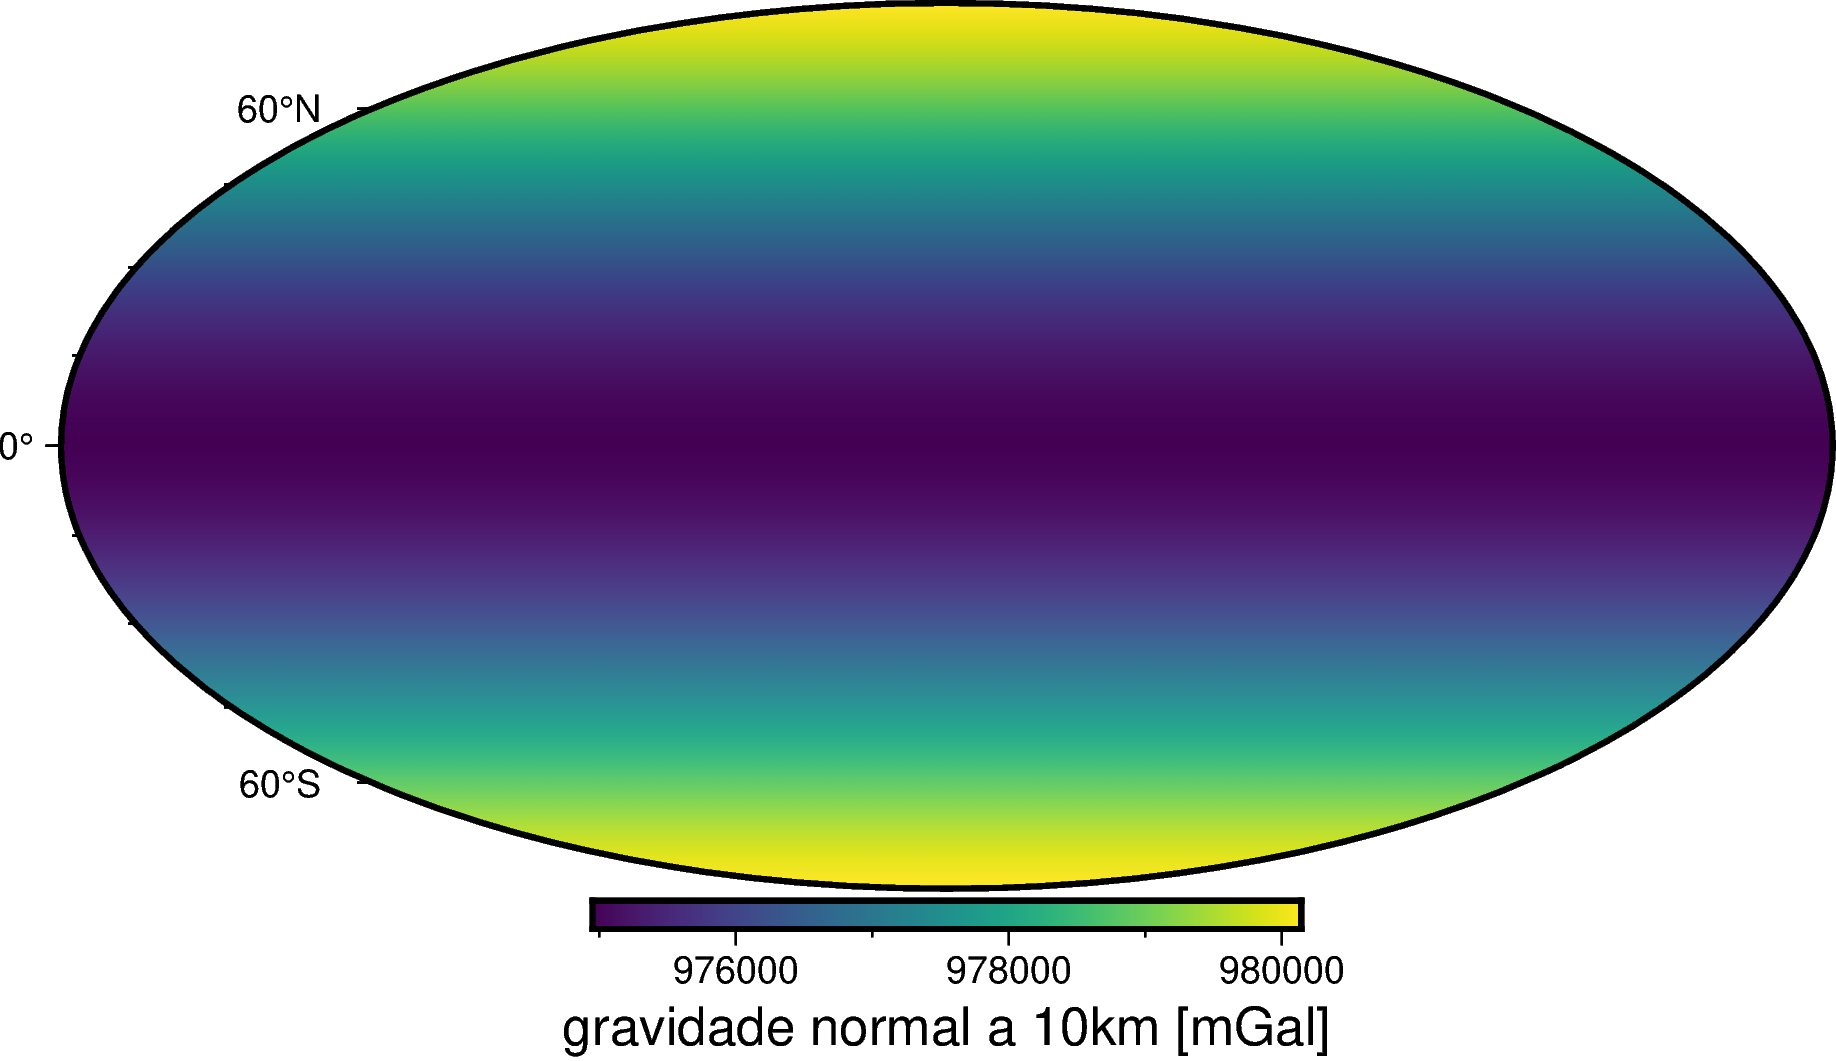

In [6]:
fig = pygmt.Figure()
fig.grdimage(
    grid=normal,
    cmap="viridis",
    shading="+a45+nt0.1",
    projection="W180/15c",
    frame="af",
)
fig.colorbar(
    frame='af+l"gravidade normal a 10km [mGal]"',
    position="JBC+h+o0/0.1c+w6c",
)
fig.show()

## Distúrbio da gravidade

In [7]:
disturbio = gravidade - normal
disturbio

<xarray.DataArray (latitude: 1081, longitude: 2161)>
array([[-35.83509235, -35.83509235, -35.83509235, ..., -35.83509235,
        -35.83509235, -35.83509235],
       [-34.04097894, -34.04097894, -34.04097894, ..., -34.04097894,
        -34.04097894, -34.04097894],
       [-33.34614042, -33.34614042, -33.34614042, ..., -33.40864042,
        -33.40864042, -33.34614042],
       ...,
       [ 11.65385958,  11.59135958,  11.46635958, ...,  11.77885958,
         11.65385958,  11.65385958],
       [ 18.14652106,  18.14652106,  18.14652106, ...,  18.14652106,
         18.14652106,  18.14652106],
       [ 15.16490765,  15.16490765,  15.16490765, ...,  15.16490765,
         15.16490765,  15.16490765]])
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.8 180.0
  * latitude   (latitude) float64 -90.0 -89.83 -89.67 -89.5 ... 89.67 89.83 90.0
    height     (latitude, longitude) float32 1e+04 1e+04 1e+04 ... 1e+04 1e+04

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


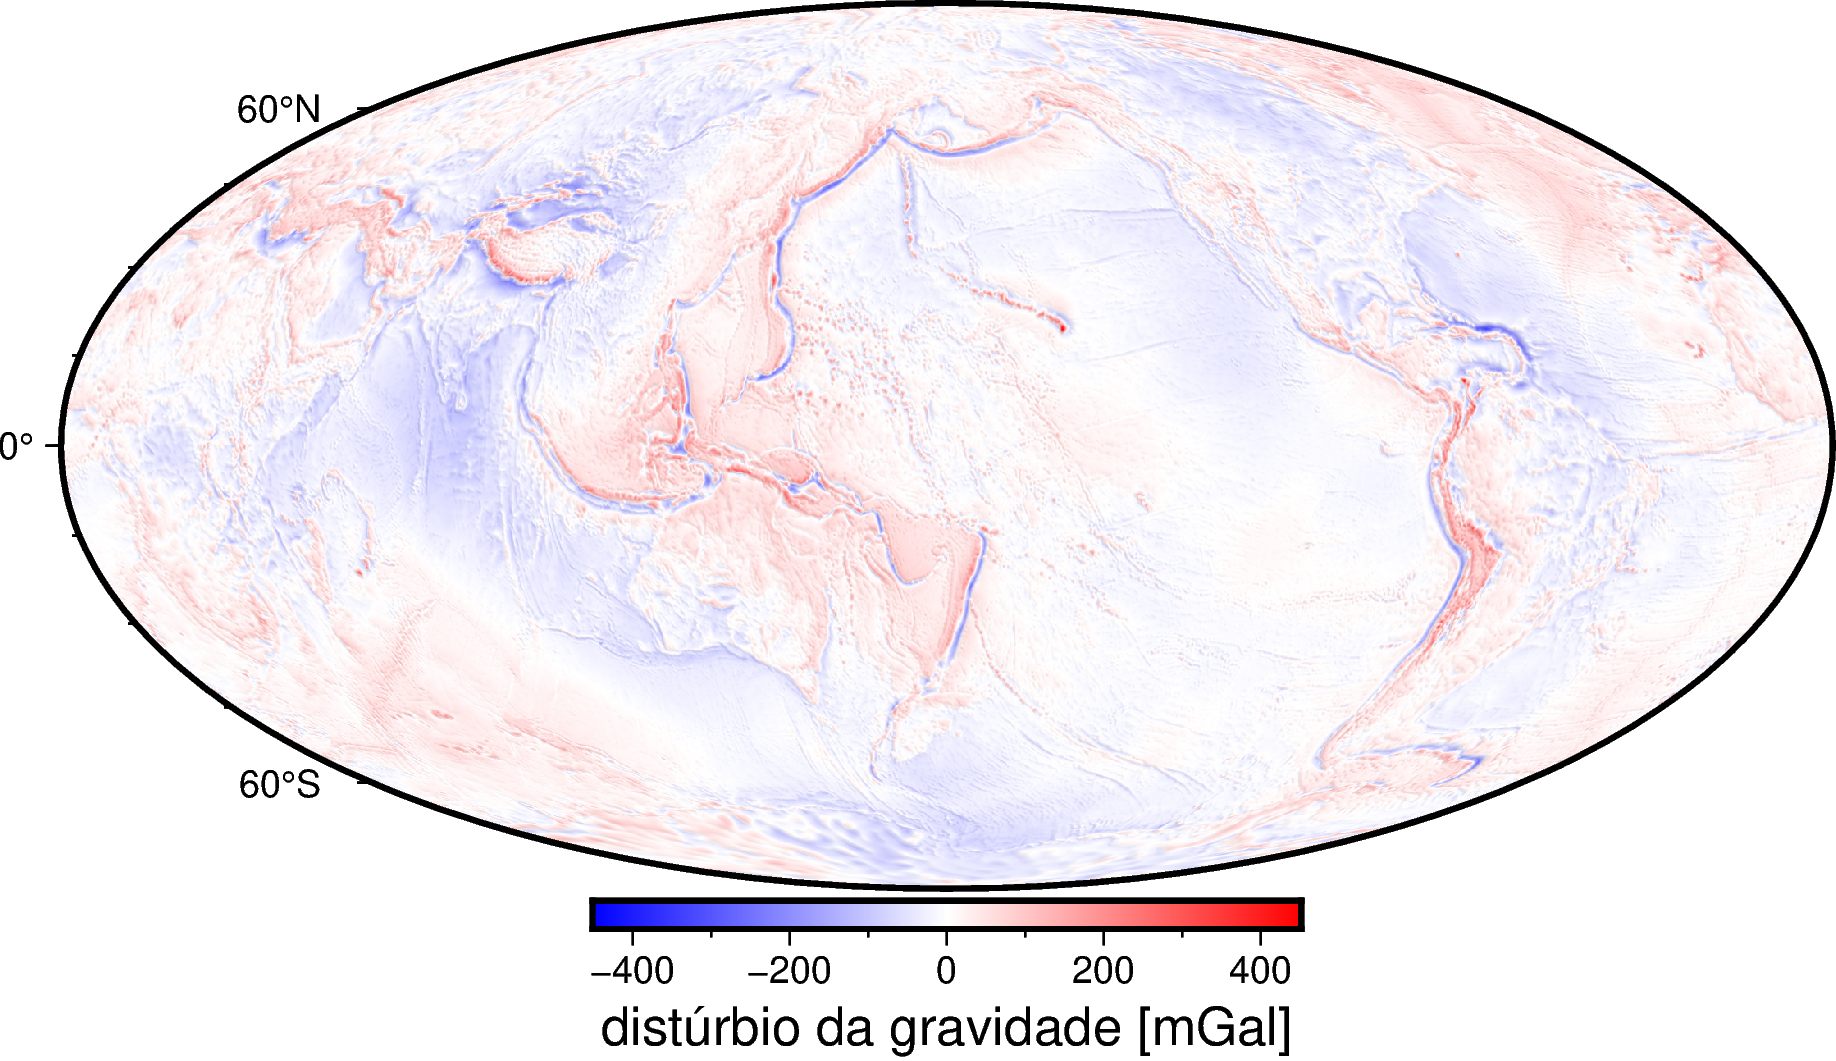

In [8]:
fig = pygmt.Figure()
scale = vd.maxabs(disturbio)
pygmt.makecpt(cmap="polar+h", series=[-scale, scale], background=True)
fig.grdimage(
    grid=disturbio,
    cmap=True,
    shading="+a45+nt0.1",
    projection="W180/15c",
    frame="af",
)
fig.colorbar(
    frame='af+l"distúrbio da gravidade [mGal]"',
    position="JBC+h+o0/0.1c+w6c",
)
fig.savefig("../assets/disturbio.png")
fig.show()

## Topografia

In [9]:
caminho = ensaio.fetch_earth_topography(version=1)
topografia_geoide = xr.load_dataarray(caminho)

In [10]:
caminho = ensaio.fetch_earth_geoid(version=1)
geoid = xr.load_dataarray(caminho)

In [11]:
topografia = topografia_geoide + geoid

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


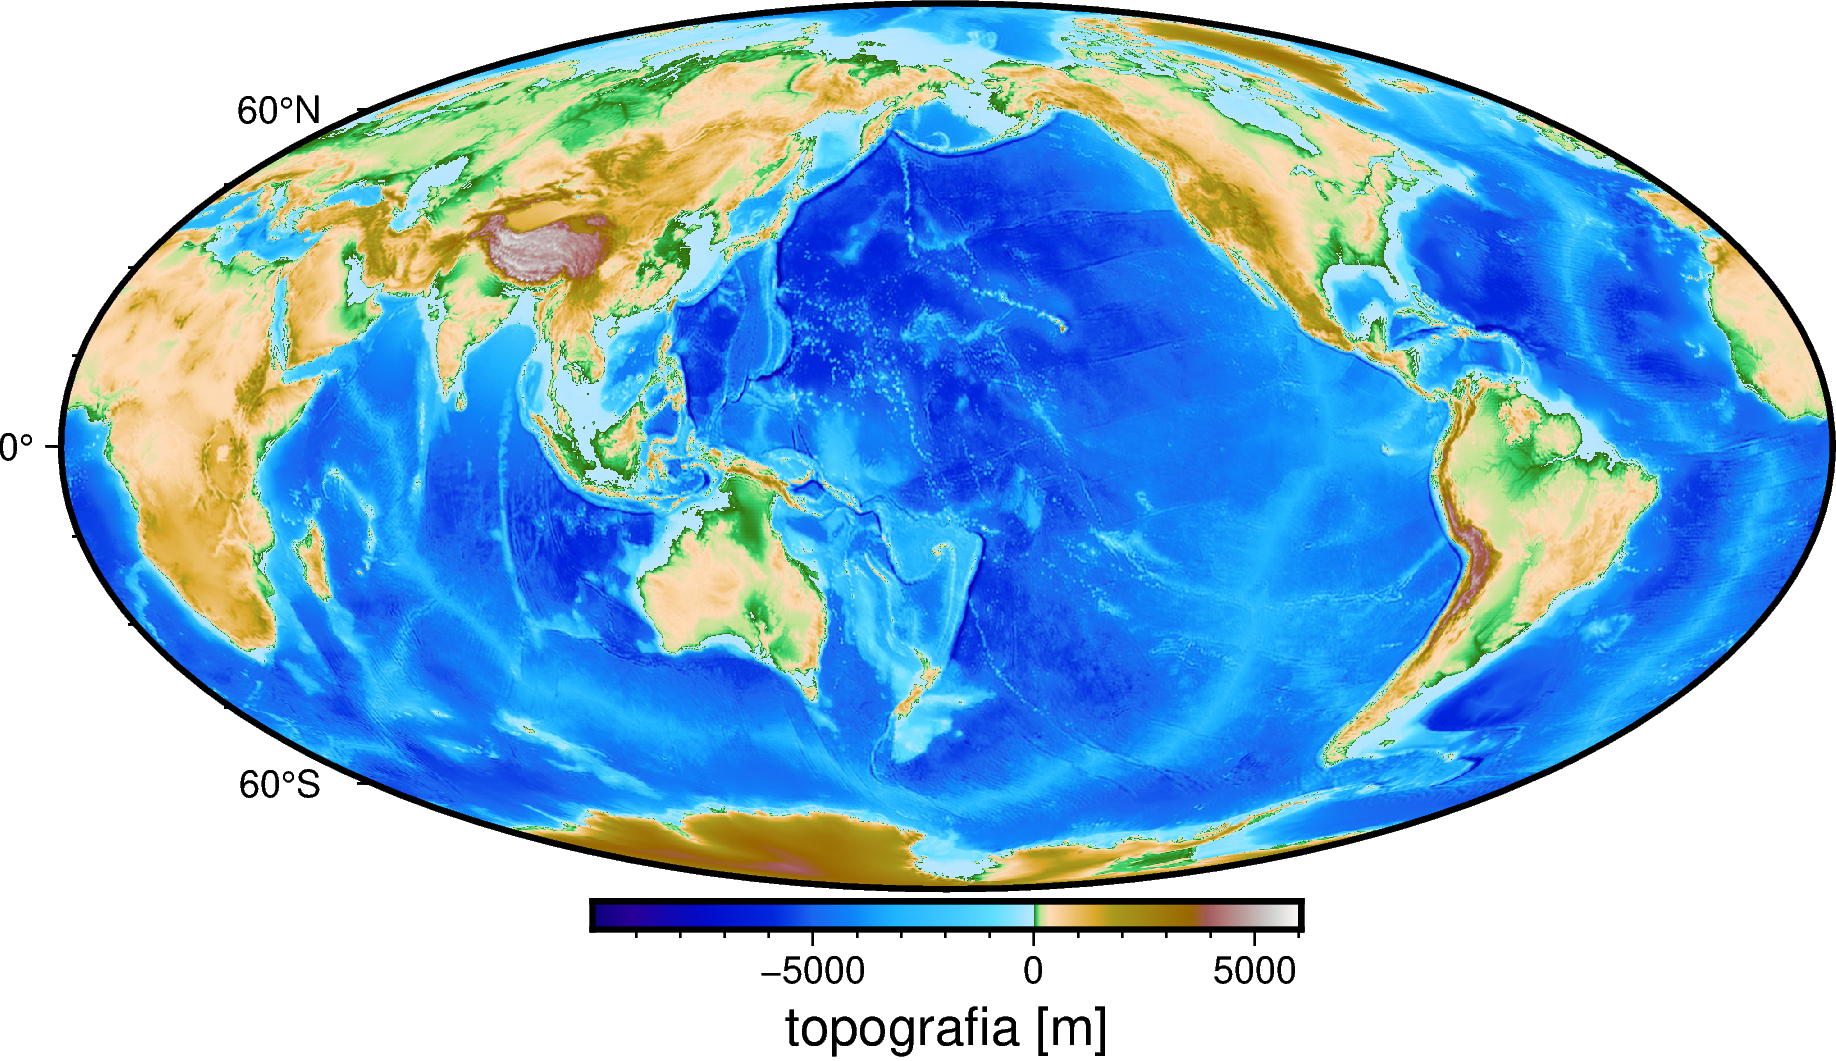

In [12]:
fig = pygmt.Figure()
fig.grdimage(
    grid=topografia,
    cmap="etopo1",
    shading="+a45+nt0.1",
    projection="W180/15c",
    frame="af",
)
fig.colorbar(
    frame='af+l"topografia [m]"',
    position="JBC+h+o0/0.1c+w6c",
)
fig.show()

## Anomalia Bouguer simples

In [13]:
bouguer = disturbio - hm.bouguer_correction(topografia)

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


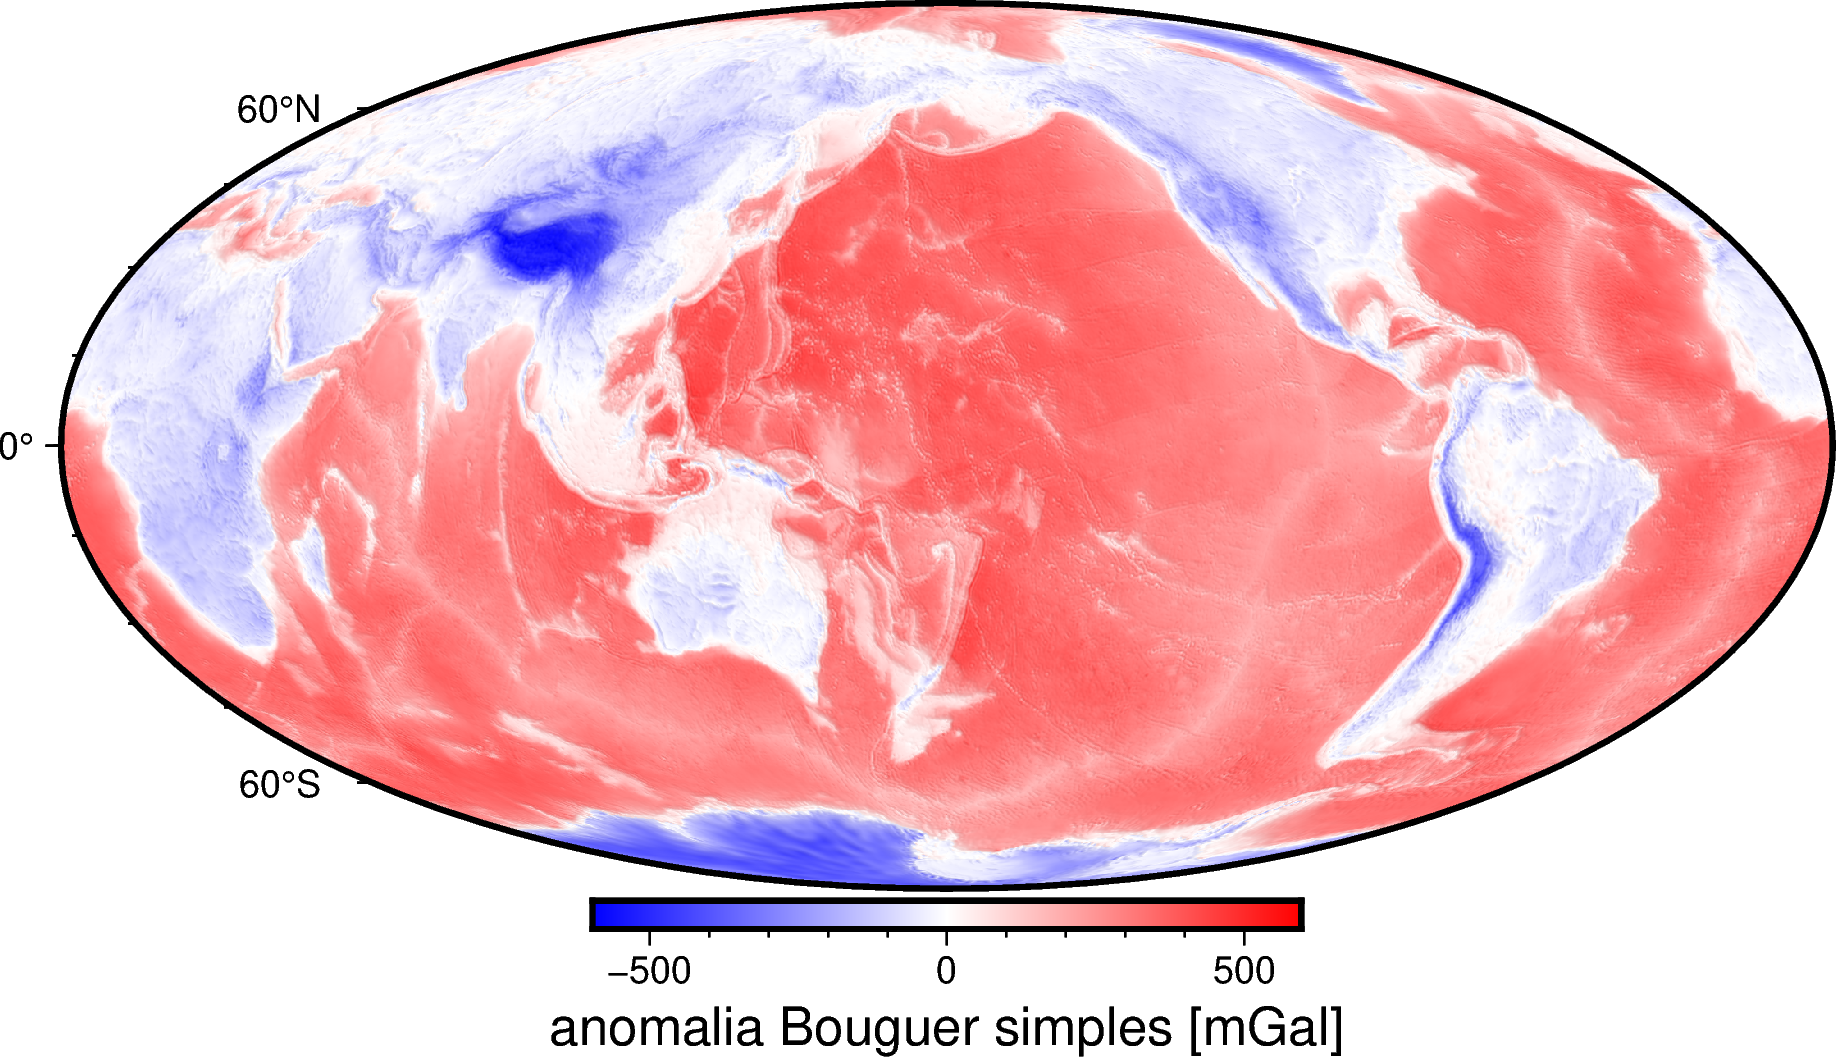

In [14]:
fig = pygmt.Figure()
scale = vd.maxabs(bouguer)
pygmt.makecpt(cmap="polar+h", series=[-scale, scale], background=True)
fig.grdimage(
    grid=bouguer,
    cmap=True,
    shading="+a45+nt0.1",
    projection="W180/15c",
    frame="af",
)
fig.colorbar(
    frame='af+l"anomalia Bouguer simples [mGal]"',
    position="JBC+h+o0/0.1c+w6c",
)
fig.show()

## Junta os dados

In [15]:
dados = xr.Dataset(
    dict(
        gravidade=gravidade,
        disturbio=disturbio,
        topografia=topografia_geoide,
        bouguer=bouguer,
    )
)
dados

<xarray.Dataset>
Dimensions:     (longitude: 2161, latitude: 1081)
Coordinates:
  * longitude   (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.8 180.0
  * latitude    (latitude) float64 -90.0 -89.83 -89.67 ... 89.67 89.83 90.0
    height      (latitude, longitude) float32 1e+04 1e+04 1e+04 ... 1e+04 1e+04
Data variables:
    gravidade   (latitude, longitude) float32 9.801e+05 9.801e+05 ... 9.802e+05
    disturbio   (latitude, longitude) float64 -35.84 -35.84 ... 15.16 15.16
    topografia  (latitude, longitude) float32 2.742e+03 2.742e+03 ... -4.237e+03
    bouguer     (latitude, longitude) float64 -339.5 -339.5 ... 303.7 303.7

In [16]:
dados.to_netcdf("dados.nc")